In [12]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from spotifuncs import *

In [2]:
path = Path("C:/Users/ms101/OneDrive/DataScience_ML/projects/spotify_app")

In [3]:
with open(path / "client_s.txt") as f:
    content = f.readlines()
content = [x.strip() for x in content]

client_id = content[0]
client_secret = content[1]

In [4]:
with open(path / "usernames.txt") as f:
    usernames = f.readlines()
usernames = [x.strip() for x in usernames]

username = usernames[2]


In [5]:
scope = "user-library-read user-read-recently-played user-top-read playlist-modify-public playlist-read-private playlist-read-collaborative"

redirect_uri = "https://developer.spotify.com/dashboard/applications/4a4e029d299a4241873db8300038bf0a"

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, 
                                                      client_secret=client_secret)

In [6]:
sp = authenticate(redirect_uri, client_credentials_manager, username, scope, client_id, client_secret)

In [36]:
top_tracks_short = sp.current_user_top_tracks(limit = 50,offset=0,time_range='short_term')
top_tracks_med = sp.current_user_top_tracks(limit = 50,offset=0,time_range='medium_term')
top_tracks_long = sp.current_user_top_tracks(limit = 50,offset=0,time_range='long_term')

#combine the top_tracks
top_tracks_short_df = append_audio_features(create_df_top_songs(top_tracks_short),sp)
top_tracks_med_df = append_audio_features(create_df_top_songs(top_tracks_med),sp)
top_tracks_long_df = append_audio_features(create_df_top_songs(top_tracks_long),sp)

top_tracks_short_df["Timeframe"] = "short term"
top_tracks_med_df["Timeframe"] = "medium term"
top_tracks_long_df["Timeframe"] = "long term"

top_tracks = pd.concat([top_tracks_short_df, top_tracks_med_df, top_tracks_long_df])
top_tracks = top_tracks.reset_index(drop = True)

top_artists_long = sp.current_user_top_artists(limit = 50, time_range = "long_term")
top_artists_med = sp.current_user_top_artists(limit = 50, time_range = "medium_term")
top_artists_short = sp.current_user_top_artists(limit = 50, time_range = "short_term")


artists_short_df = top_artists_from_API(top_artists_short)
artists_med_df = top_artists_from_API(top_artists_med)
artists_long_df = top_artists_from_API(top_artists_long)


artists_df = pd.concat([artists_short_df,artists_med_df,artists_long_df])
artists_df["genres"] = artists_df["genres"].apply(lambda x: ",".join(x))
artists_df.drop_duplicates().reset_index(drop = True)

TypeError: drop_duplicates() got an unexpected keyword argument 'axis'

In [ ]:
top_tracks.drop_duplicates()

In [13]:
list(top_tracks_short_df.columns[6:-2])

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence']

In [14]:
audio_features = list(top_tracks_short_df.columns[6:-2])
audio_features.append("Timeframe")

In [15]:
audio_overtime_df = top_tracks[audio_features].groupby("Timeframe").mean()
audio_overtime_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence
Timeframe,,,,,,,,,,
long term,0.66304,0.63300,5.86,-6.61438,0.60,0.092126,0.251583,0.005209,0.170326,0.471144
medium term,0.68136,0.62924,5.18,-6.76458,0.58,0.095004,0.226746,0.004104,0.138608,0.420542
short term,0.65956,0.62590,5.46,-7.11388,0.52,0.116136,0.242122,0.004663,0.143208,0.384246


In [16]:
audio_overtime_df.reset_index(inplace = True)

In [17]:
plot_df = pd.melt(audio_overtime_df, id_vars = "Timeframe",
                           var_name = "audio_feature", value_name = "mean")
plot_df

,Timeframe,audio_feature,mean
0,long term,danceability,0.663040
1,medium term,danceability,0.681360
2,short term,danceability,0.659560
3,long term,energy,0.633000
4,medium term,energy,0.629240
5,short term,energy,0.625900
6,long term,key,5.860000
7,medium term,key,5.180000
8,short term,key,5.460000
9,long term,loudness,-6.614380


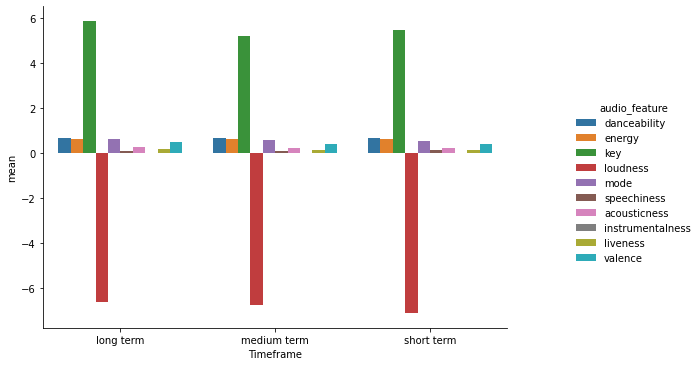

In [18]:
#%matplotlib inline
sns.catplot(data = plot_df, kind = "bar", x = "Timeframe",
            y = "mean", hue = "audio_feature"
)
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

In [19]:
cluster_feat = audio_features[:-1]
cluster_feat

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence']

array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>],
       [<AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>]], dtype=object)

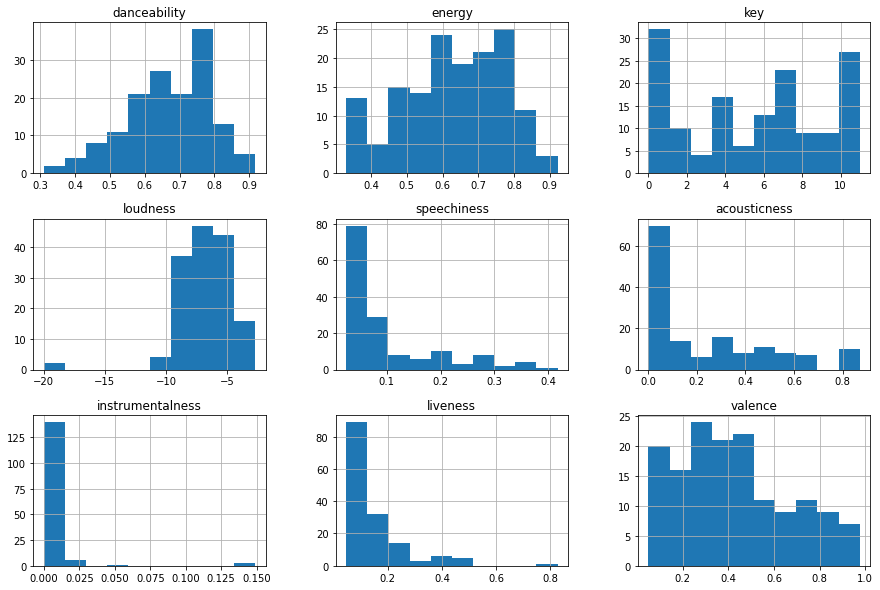

In [20]:
df_cluster = top_tracks[cluster_feat].drop("mode",axis = 1)
df_cluster.hist(figsize= (15,10))

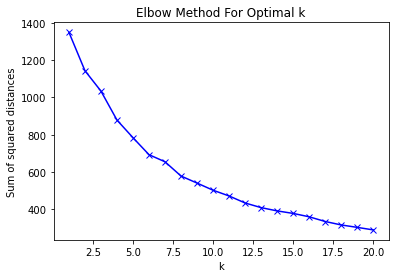

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = np.array(df_cluster)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)


ss_dist = []
for k in range(1,21):
    km = KMeans(n_clusters=k,max_iter = 10000 ,random_state=13)
    km = km.fit(X)
    ss_dist.append(km.inertia_)
    
plt.plot(range(1,21), ss_dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()



In [54]:
n_cluster = 6
km = KMeans(n_clusters = n_cluster, max_iter = 10000, random_state=13).fit(X)

In [55]:
X_pred = km.predict(X)

In [56]:
X_pred.shape

(150,)

In [57]:
top_tracks["cluster"] = X_pred

In [58]:
for i in range(1,n_cluster+1):
    print("\n",top_tracks[["track_name","artist"]][top_tracks["cluster"] == i].drop_duplicates(), "\n")



                                      track_name             artist
0                                          Swim     Chase Atlantic
1               WHAT TO DO? (feat. Don Toliver)           JACKBOYS
6                                       Friends     Chase Atlantic
7                                       Into It     Chase Atlantic
24             Consume (feat. Goon Des Garcons)     Chase Atlantic
28                                    Triggered     Chase Atlantic
31                                       Lonely             Tujamo
33                                       Cassie     Chase Atlantic
40          Jenny (I Wanna Ruin Our Friendship)     Studio Killers
44                                         Elbe              Bozza
47                                   Endorphine            TheDoDo
72                              Einsam zu zweit         Simon Will
80   Still Be Friends (feat. Tory Lanez & Tyga)             G-Eazy
84                                     Birthday         Anne

In [68]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=50, n_iter=5000, random_state=13)
tsne_results = tsne.fit_transform(X)

df_tsne = pd.DataFrame(tsne_results)
df_tsne.columns = ['D1', 'D2']
df_tsne['label'] = km.labels_
df_tsne.head()

,D1,D2,label
0,6.863089,-1.670393,1
1,5.682193,-1.202821,1
2,5.078915,8.645298,5
3,15.102798,1.840069,4
4,1.558045,-1.024725,3


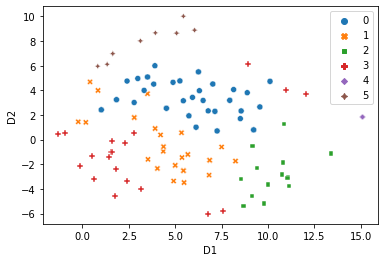

In [69]:
sns.scatterplot(data = df_tsne, x = "D1", y = "D2", hue = "label", style = "label",
                palette = "tab10")
plt.legend()
plt.show()

In [71]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state=123)
pca_results = pca.fit_transform(X)
print(pca.explained_variance_ratio_.sum())
pca.explained_variance_ratio_.cumsum()

0.5165248776302663


array([0.23168215, 0.37986748, 0.51652488])

not enough variance explained for sensible visualisation

In [81]:
tsne3 = TSNE(n_components=3, n_iter=5000, random_state=13, perplexity=50)
tsne_results = tsne3.fit_transform(X)

In [82]:
df_tsne3 = pd.DataFrame(tsne_results)
df_tsne3.columns = ['D1', 'D2', 'D3']
df_tsne3['label'] = km.labels_
df_tsne3.head()

,D1,D2,D3,label
0,319.200439,-439.416870,126.497627,1
1,-520.957153,213.080902,125.888298,1
2,48.696793,-396.901917,-115.757065,5
3,249.764771,-318.775635,-221.322861,4
4,31.470423,172.063644,567.372559,3


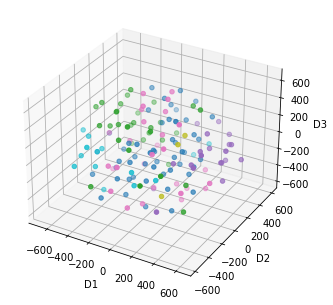

In [83]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(df_tsne3['D1'], df_tsne3['D2'], df_tsne3['D3'],
           c=df_tsne3['label'], cmap='tab10')

ax.set_xlabel('D1')
ax.set_ylabel('D2')
ax.set_zlabel('D3')
plt.show()